## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
dataset_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display Tumor Volume (mm3) with one decimal place
#dataset_df['Tumor Volume (mm3)']=dataset_df['Tumor Volume (mm3)'].map("{:,.1f}".format)

#dataset_df.round({'Tumor Volume (mm3)':1})
dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summarystats=dataset_df[['Drug Regimen','Tumor Volume (mm3)']]
assignee_group=summarystats.groupby(['Drug Regimen'])
#Mean tumor vol
mean_tumor_vol=assignee_group['Tumor Volume (mm3)'].mean()
median_tumor_vol=assignee_group['Tumor Volume (mm3)'].median()
variance_tumor_vol=assignee_group['Tumor Volume (mm3)'].var()
stddev_tumor_vol=assignee_group['Tumor Volume (mm3)'].std()
stderr_tumor_vol=assignee_group['Tumor Volume (mm3)'].sem()

summarystats=pd.DataFrame({'Mean Tumor Volume':mean_tumor_vol,
                          'Median Tumor Volume':median_tumor_vol,
                          'Tumor Volume Variance':variance_tumor_vol,
                          'Tumor Volume Std. Dev.':stddev_tumor_vol,
                          'Tumor Volume Std. Err.':stderr_tumor_vol,})

summarystats.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [7]:
groupby_points=dataset_df.groupby(['Drug Regimen'])
count_data_points=groupby_points['Timepoint'].count()
datapoints_summary_table=pd.DataFrame(count_data_points)
datapoints_summary_table=datapoints_summary_table.sort_values(by=['Timepoint'], ascending=False)
datapoints_summary_table


,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


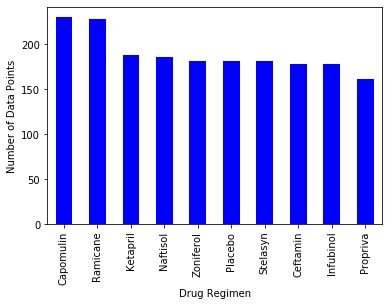

In [8]:
datapoints_summary_table.plot(kind='bar', facecolor='blue',legend=None)
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.show()

In [9]:
drug_regime=dataset_df['Drug Regimen'].unique()
drug_regime

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

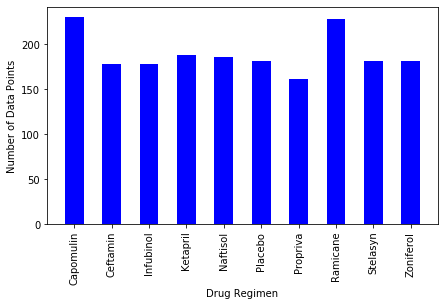

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(7,4))
plt.bar(count_data_points.index,count_data_points.values, color="blue", align="center", width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

## Pie plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=dataset_df.groupby(['Sex'])
gender_count=gender_group['Mouse ID'].nunique()
st_df = pd.DataFrame(gender_count)
st_df['Percentage']=((gender_count/sum(gender_count))*100).round(2)
st_df.head()

,Mouse ID,Percentage
Sex,,
Female,124,49.8
Male,125,50.2


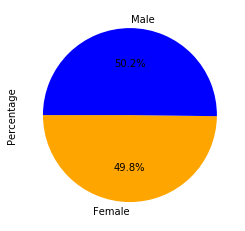

In [23]:
colors = ['orange','blue']
Sex_distribution_pie=st_df['Percentage'].plot(kind='pie', y=gender_group, autopct='%1.1F%%', colors=colors, startangle=180)


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen